# Templates

Here are graphical templates and instructions for getting pencils in motion. 

Three activities here

- A circle template for calculating pi
- Pyramid for exploring Meru prastarah / the Pascale triangle
- A grid for creating a Fibonacci spiral.

The sequence of cells is like this: 

1. Some Python code to draw the template
2. The template
3. Instructions



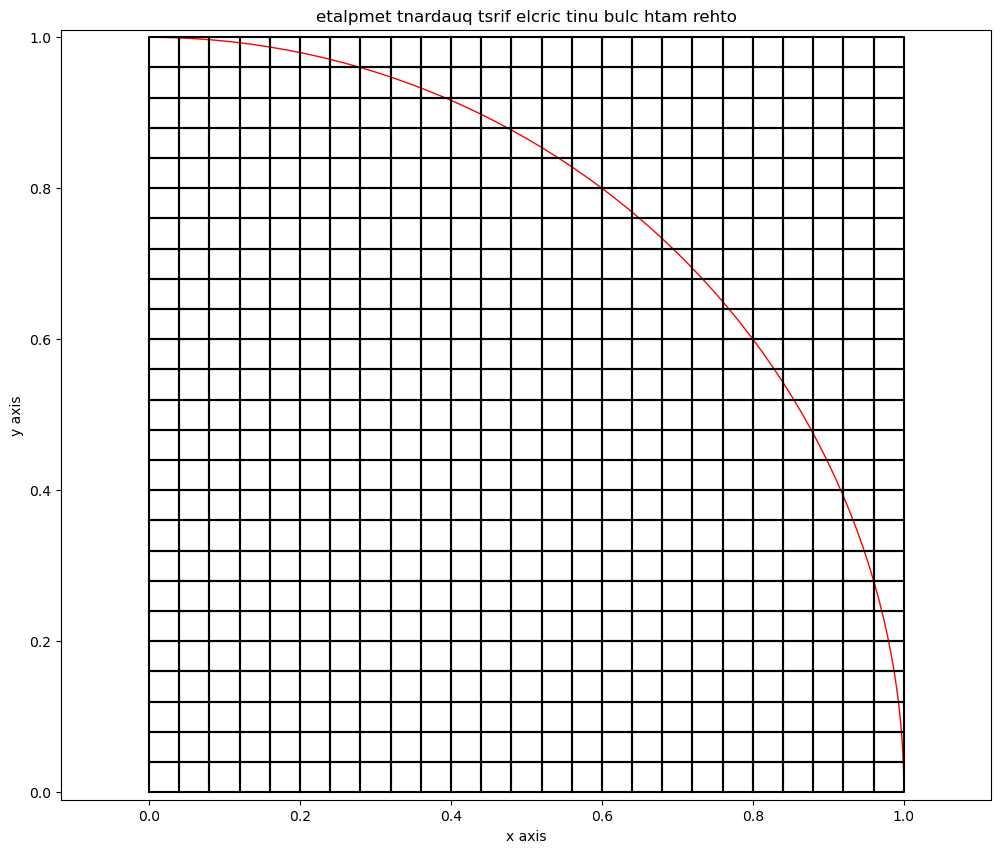

In [2]:
# This program draws the first quadrant of the unit circle for calculating pi.
# Use the fragment_factor to control the fineness of your results

do_unit_quadrant = True
fragment_factor = 25.0

# make plots inline (so that they do not pop-out)
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Arc

pi = np.pi

def dtr(a):
    return a*pi/180.

def rtd(a):
    return a*180./pi

fig, ax = plt.subplots(figsize=(12,10))
ax.axis('equal')

lower_limit = -0.01
upper_limit = 1.01
ax.set(xlim=(lower_limit, upper_limit), ylim=(lower_limit,upper_limit))
ax.set(xlabel='x axis', ylabel = 'y axis', title='etalpmet tnardauq tsrif elcric tinu bulc htam rehto')

if do_unit_quadrant:
    dx = 1.0/fragment_factor
    dy = 1.0/fragment_factor
    for i in range(int(fragment_factor)):
        for j in range(int(fragment_factor)):
            x = float(i)*dx
            y = float(j)*dy
            ax.plot([x, x+dx, x+dx, x, x], [y, y, y+dy, y+dy, y], color='k')
    ax.add_patch(Arc([0.0, 0.0], width=2., height=2., angle = 0.0, theta1=0.0, theta2=90.0, fill=False, color='r'))

plt.show()


### Calculating $\pi$

Notice that the grid is 25 x 25 cells for a total of 625 total. This corresponds to an area of 1 x 1, in other words one square unit. We can write this as a ratio of actual area to grid cells, as in: 

$$Ratio = \frac{1\;square\;units}{625\;grid\;cells}$$

Now if we draw a figure on the grid it will have some area A. If we count how many grid cells $n$ are in the figure it will follow the same ratio rule; and we can solve for $A$ (since we know $n$):

$$\frac{A}{n}=\frac{1}{625}$$

We have drawn one quarter of the unit circle as a red arc on this diagram. If you count the number of cells under this arc you will be able to calculate one quarter of the area of the unit circle directly. If you then multiply this result by four you will have an approximate value for the area of the unit circle. You may wish to compare this number with the value of $\pi$.

Notice you can change *fragment_factor* in the Python code above to change your grid.



### Filling in the Pascal triangle

This triangle can be filled in however you like. The traditional method is to write $1$ in the first and last row of each cell. The top of the triangle is $1$, then the next row reads $1\;\;1$, and then the row after that has an empty cell in the center surrounded by two $1$s. The value in this cell and (in order) in the empty cells below is the sum of the two cells above it. So this first empty cell has a value of $1+1$ or $2$. The next row below that will be $1\;3\;3\;1$ and then $1\;4\;6\;4\;1$ and so on. Let's call this the numerical version of the triangle.

You will find that the numbers in the centers of the rows grow surprisingly quickly.

Another interesting thing to try is to simply color the cells based on whether the number they contain is even or odd, for example black for odd and empty for even. The resulting pattern should be left-right symmetrical and it can be built row by row without actually calculating the numbers in the triangle. How would you do this? Let's call this the binary version of the triangle.

Once you have a numerical version of the triangle you may want to go further. Here are some guiding questions: 

* What do the rows sum to? 
* If the first row is row $0$ and the next row is row $1$ then what is the sum of the numbers in row $n$?
* Pick one of the $1$s along one of the edges and "walk" downwards along a diagonal for a few steps, say 3 or 4 or 5 steps. Sum all the numbers as you go; what do you notice about the total?

#### A complicated procedure
Here is a complicated procedure to try out on a numerical triangle. It takes a few steps but the results are quite interesting (according to both the lion and the unicorn.) It is a way of *adding up* all of the cells in the triangle in little strips.

From each $1$ on the left diagonal draw a red line horizontally across the row to the opposite $1$ on the right diagonal. Then draw some diagonal lines as follows: Choose another color if possible. Begin with the second element in the bottom row of your triangle. Draw a diagonal line up and to the right until you reach the $1$ on the right diagonal. Keep going across the bottom row drawing successive diagonals (all parallel to one another) in this fashion. You should now have two sets of lines crossing your numerical Pascal triangle. 

Now return to the left-most $1$ on the bottom row. You will follow a double-step rule that will take you along a little strip across the triangle. You must add up all the numbers you find until you run out of numbers. Then write this sum down and proceed to the next $1$ up the left diagonal following the same rule. (You can also begin at the top and go down if you like.) This double-step rule will eventually count up all of the cells in the Pascal triangle, each cell being counted just once. 

##### The double-step rule
From where you are located: Take one step along your current row to the right and then take one step from that location along the diagonal up and to the right. This double step lands you on the next cell to add to this strip. For example if I begin at row $5$ which reads $1\;5\;10\;10\;5\;1$ (because remember the first row of the triangle is row $0$) then I get the following strip: $1+4+3$ for a sum of $8$. The next sum below that is $1+5+6+1$ or $13$. Write these sums in along the left diagonal of the triangle. Are they interesting as the lion and the unicorn claimed? 

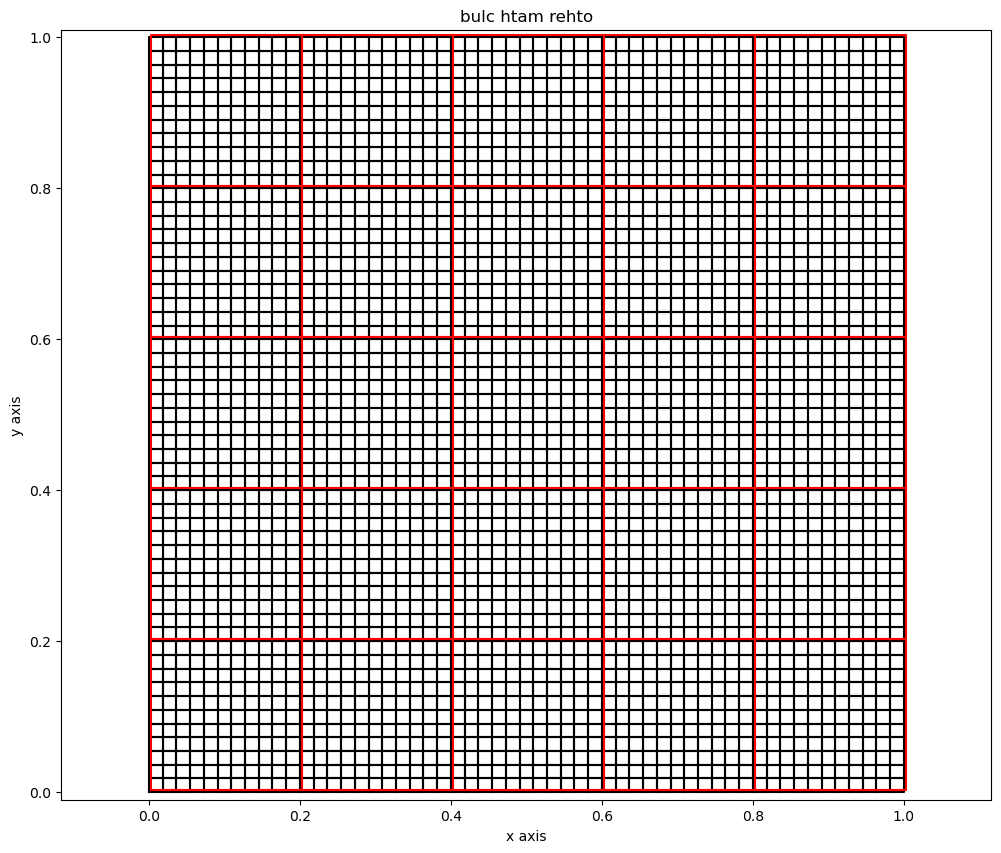

In [3]:
# This program draws two grids, a coarse one and a fine one in red and black respectively. 
#   They can be used to draw and compare two versions of the Fibonacci spiral which approximates 
#   a logarithmic spiral. See also the Fibonacci spiral in this notebook.
# Use the factors below to fine-tune your results

do_log_spiral_template = True
do_add_small_arcs = False # not implemented yet
do_add_big_arcs = False # not implemented yet
log_spiral_factor = 55.0
scale_down_factor = log_spiral_factor / 11
epsilon = .003

# make plots inline (so that they do not pop-out)
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Arc

fig, ax = plt.subplots(figsize=(12,10))
ax.axis('equal')

lower_limit = -0.01
upper_limit = 1.01
ax.set(xlim=(lower_limit, upper_limit), ylim=(lower_limit, upper_limit))
ax.set(xlabel='x axis', ylabel = 'y axis', title='bulc htam rehto')

if do_log_spiral_template:
    dx = 1.0/log_spiral_factor
    dy = 1.0/log_spiral_factor
    for i in range(int(log_spiral_factor)):
        for j in range(int(log_spiral_factor)):
            x = float(i)*dx
            y = float(j)*dy
            ax.plot([x, x+dx, x+dx, x, x], [y, y, y+dy, y+dy, y], color='k')
    dx = 1.0/scale_down_factor
    dy = 1.0/scale_down_factor
    for i in range(int(scale_down_factor)):
        for j in range(int(scale_down_factor)):
            x = float(i)*dx + epsilon
            y = float(j)*dy + epsilon
            ax.plot([x, x+dx, x+dx, x, x], [y, y, y+dy, y+dy, y], color='r')
 
plt.show()


### Using the grid for a spiral

Write down the first few numbers of the Fibonacci sequence: 0, 1, 1, 2, 3, 5, 8, ... and notice that these could easily be radii of circles. The grid gives you an opportunity to draw quarter-circle arcs and connect them together. These directions should help. 

First let's draw a circle of radius zero by marking a point of the grid somewhere near the center. On the grid, not within the grid cell. 

Next we have a radius of one; so draw a quarter-circle arc from your starting point down and to the right. This occupies one of the fine grid cells. From the end point draw another quarter circle arc of radius one: Up and to the right. You have now drawn one half of a circle since both radii were 1, the first two Fibonacci numbers. 

The next Fibonacci number is 2. From where you ended draw a quarter circle arc up and to the left of radius two. You should be two grid cells above where you began. Your next Fibonacci number is 3. Again: Start where you left off and draw a quarter circle arc. You always continue in the direction you were last headed and continue around in a spiral direction. In our case we are going counter-clockwise. Draw the arc to the left and curving down, radius 3. From there draw a quarter circle arc down and curving right of radius 5.

Notice that each successive arc causes the spiral to expand; and this arc resides within a square whose sides are the next Fibonacci number. You should be able to continue for a few more Fibonacci numbers. 

Notice also that there is a coarse red grid. Might you start on this grid and draw a much larger spiral? Does it resemble the small one?

This activity is one branch of the *Fibonacci topic* within the other math club landscape. See us for more.

### The XOR universe: Let there be dot!

The idea here is a chart of cells that will accommodate a dot (say in row 3) with time proceeding down the page.



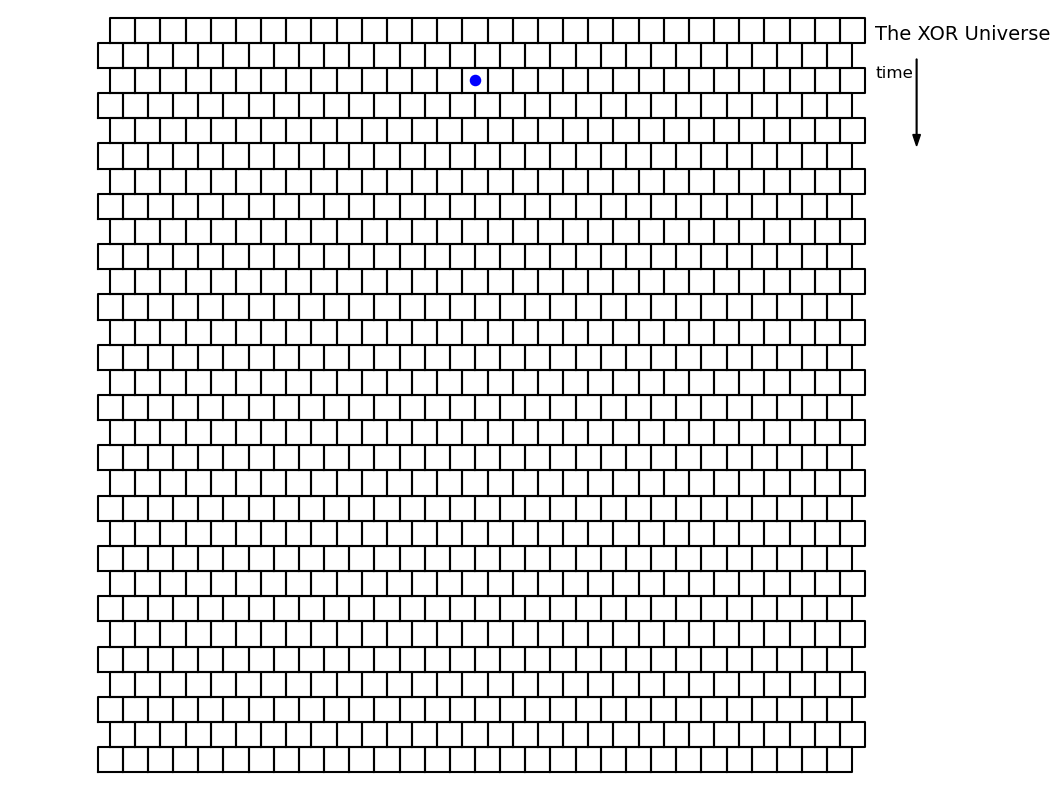

In [4]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import comb

fig, ax = plt.subplots(figsize=(12,10))
ax.axis('equal')

lower_limit = -0.01
upper_limit = 1.01
ax.set(xlim=(lower_limit, upper_limit), ylim=(lower_limit,upper_limit))

eorowPrev = []
eorowThis = []
xc = []        # xc[] and yc[] will be center coordinates of odd-location dots
yc = []

pascal_size = 30
dx = 1.0/pascal_size
dy = 1.0/pascal_size

halfdx = dx / 2.0
halfdy = dy / 2.0

for row in range(1, int(pascal_size) + 1):
    for column in range(int(pascal_size)):
        x = float(column)*dx + (row % 2)*halfdx
        y = 1.0 - dy*float(row)
        ax.plot([x, x+dx, x+dx, x, x], [y, y, y+dy, y+dy, y], color='k')

xc.append(0.5 - .5*dx + halfdx)
yc.append(1 - dy*3 + halfdy)

plt.text(1.03, 0.97, "The XOR Universe", fontsize='14')  
plt.text(1.03, 0.92, "time", fontsize='12')  
plt.arrow(1.085, .945, 0.0, -.1, head_width = .01, fc='k')

pssquared = float(pascal_size*pascal_size)
dotsize = (80.*80.*30.)/pssquared
ax.scatter(xc, yc, s=dotsize, marker='.', color='b')
ax.axis("off")
plt.show()

In [6]:
do_draw_odd_dots = True

# Accumulate a list of odd cells...
#   Let's take care of the even/odd values in eorowThis[]
if do_draw_odd_dots:
    eorowThis = [1]    # First element is always "odd"
    if this_row == 2:        # This clause of the if could be combined with the next
        eorowThis.append(1)
    elif this_row > 2:
        # In the following loop we are traversing the row...
        #   suppose this_row == 3 (1 2 1) then n will go 0
        #   suppose this_row == 4 (1 3 3 1) then n will go 0 1
        for n in range(this_row-2):
            if eorowPrev[n] != eorowPrev[n+1]:
                eorowThis.append(1)
            else:
                eorowThis.append(0)
        eorowThis.append(1)
    for n in range(this_row):
        if eorowThis[n] == 1: 
            xc.append(0.5 - float(this_row)*0.5*dx + float(n)*dx + halfdx)
            yc.append(1.0 - dy*float(this_row) + halfdy)
    eorowPrev = list(eorowThis)

xmp0   = 0.61
ymp0   = 0.492
xmpDx0 = 0.029
xmpDx1 = 0.059
ymp0   = 0.492
ympDy  = 0.059

# return coordinates based on a = cell (x) and b = row (y)
def xmp(a,b): return xmp0 - float(b)*xmpDx0 + float(a)*xmpDx1
def ymp(a,b): return ymp0 - float(b)*ympDy

NameError: name 'this_row' is not defined

### Meru Prastarah dots

The code below was copied from the Meru 2 page before cleaning it up. The copy is because this draws odd dots
which is a useful feature to keep around; so: preserved here. 

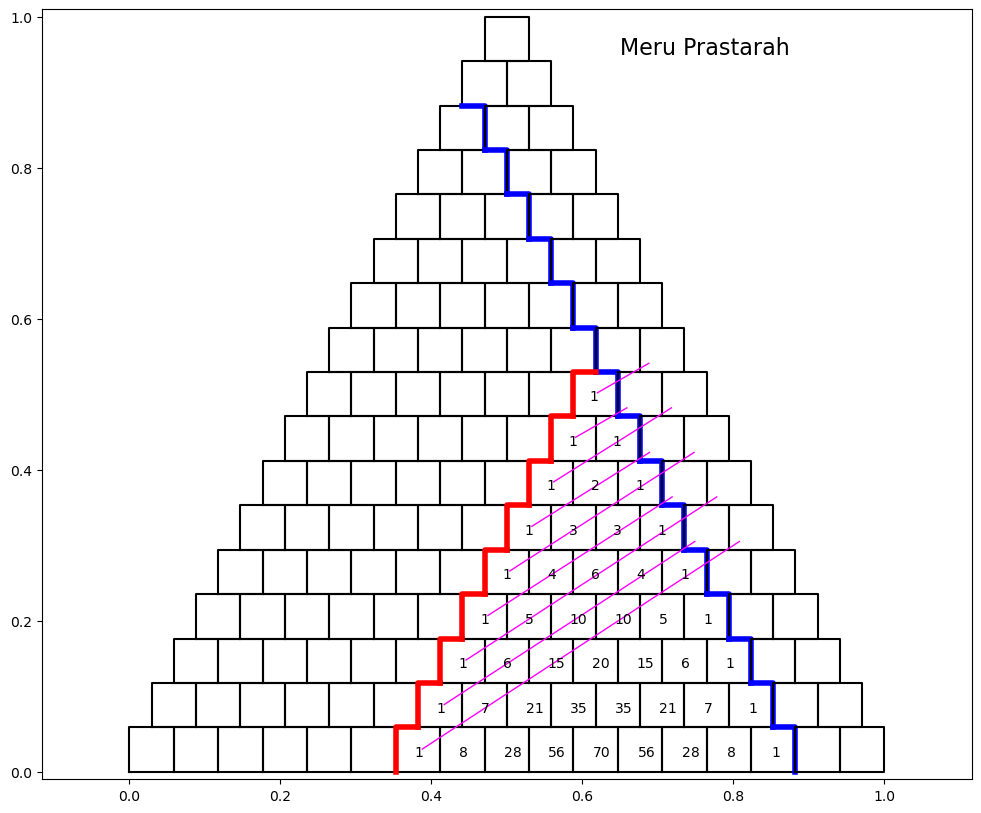

In [16]:
pascal_size = 17

do_draw_odd_dots = False
do_draw_boxes = True
do_labels = False
do_apex_1 = True
do_ul_lr_long_diagonal = True
do_ur_ll_short_diagonal = True
do_meru_prastarah = True
do_magenta_strikes = True

if pascal_size >= 100: do_draw_boxes = False
    
# make plots inline (so that they do not pop-out)
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(12,10))
ax.axis('equal')

lower_limit = -0.01
upper_limit = 1.01
ax.set(xlim=(lower_limit, upper_limit), ylim=(lower_limit,upper_limit))
if do_labels: ax.set(xlabel='x axis', ylabel = 'y axis', title='bulc htam rehto')

eorowPrev = []
eorowThis = []
xc = []        # xc[] and yc[] will be center coordinates of odd-location dots
yc = []

dx = 1.0/pascal_size
dy = 1.0/pascal_size

halfdx = dx / 2.0
halfdy = dy / 2.0

for row in range(int(pascal_size)):
    this_row = row + 1
    if do_draw_boxes:
        for column in range(this_row):
            x = 0.5 - float(this_row)*0.5*dx + float(column)*dx
            y = 1.0 - dy*float(this_row)
            ax.plot([x, x+dx, x+dx, x, x], [y, y, y+dy, y+dy, y], color='k')
            if do_ul_lr_long_diagonal and this_row >= 3 and column == this_row - 3:
                ax.plot([x+dx/2., x+dx, x+dx], [y + dy, y + dy, y], color='b', linewidth=4)
            if do_ur_ll_short_diagonal and this_row >= 9 and column == 6:
                ax.plot([x,x,x+dx/2],[y,y+dy,y+dy], color='r', linewidth=4)

    # Accumulate a list of odd cells...
    #   Let's take care of the even/odd values in eorowThis[]
    if do_draw_odd_dots:
        eorowThis = [1]    # First element is always "odd"
        if this_row == 2:        # This clause of the if could be combined with the next
            eorowThis.append(1)
        elif this_row > 2:
            # In the following loop we are traversing the row...
            #   suppose this_row == 3 (1 2 1) then n will go 0
            #   suppose this_row == 4 (1 3 3 1) then n will go 0 1
            for n in range(this_row-2):
                if eorowPrev[n] != eorowPrev[n+1]:
                    eorowThis.append(1)
                else:
                    eorowThis.append(0)
            eorowThis.append(1)
        for n in range(this_row):
            if eorowThis[n] == 1: 
                xc.append(0.5 - float(this_row)*0.5*dx + float(n)*dx + halfdx)
                yc.append(1.0 - dy*float(this_row) + halfdy)
        eorowPrev = list(eorowThis)

from scipy.special import comb

xmp0 = 0.61
ymp0 = 0.492
xmpDx0 = 0.029
xmpDx1 = 0.059
ymp0 = 0.492
ympDy = 0.059

# return coordinates based on a = cell (x) and b = row (y)
def xmp(a,b): return xmp0 - float(b)*xmpDx0 + float(a)*xmpDx1
def ymp(a,b): return ymp0 - float(b)*ympDy

# You must move this if you change the number of rows from 17
if do_apex_1:
    plt.text(xmp(0,0), ymp(0,0), "1")
    
do_all_ones = True
if do_all_ones:
    for j in range(1,9):
        for i in [0,j]:
            plt.text(xmp(i,j), ymp(i,j), "1")

do_interior_of_mp = True
if do_interior_of_mp:
    for j in range(2, 9):
        for i in range(1,j):
            plt.text(xmp(i,j), ymp(i,j), int(comb(j,i)))
    
if do_meru_prastarah:
    plt.text(0.65, 0.95, "Meru Prastarah", fontsize='16')
    
# Mapping start point of the Fibo lines to their sum cell
# 0 0 > -1 1
# 1 0 > 0 1
# 2 0 > 0 2
# 3 0 > 1 2
# 4 0 > 1 3 
# 5 0 > 2 3
# 6 0 > 2 4
# 7 0 > 3 4
# 8 0 > 3 5
if do_magenta_strikes:
    for j in range(9):
        x0 = xmp(0,j) + .01
        y0 = ymp(0,j) + .01
        jMap = (j+1)//2-1
        iMap = j//2+1
        x1 = xmp(iMap, jMap) - .01
        y1 = ymp(iMap, jMap) - .01
        # print 0, j, x0, y0, iMap, jMap, x1, y1
        ax.plot([x0, x1], [y0, y1], color='magenta', linewidth=1)
        
           
if do_draw_odd_dots:
    pssquared = float(pascal_size*pascal_size)
    dotsize = (80.*80.*30.)/pssquared
    ax.scatter(xc, yc, s=dotsize, marker='.', color='b')

plt.show()

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib
9841


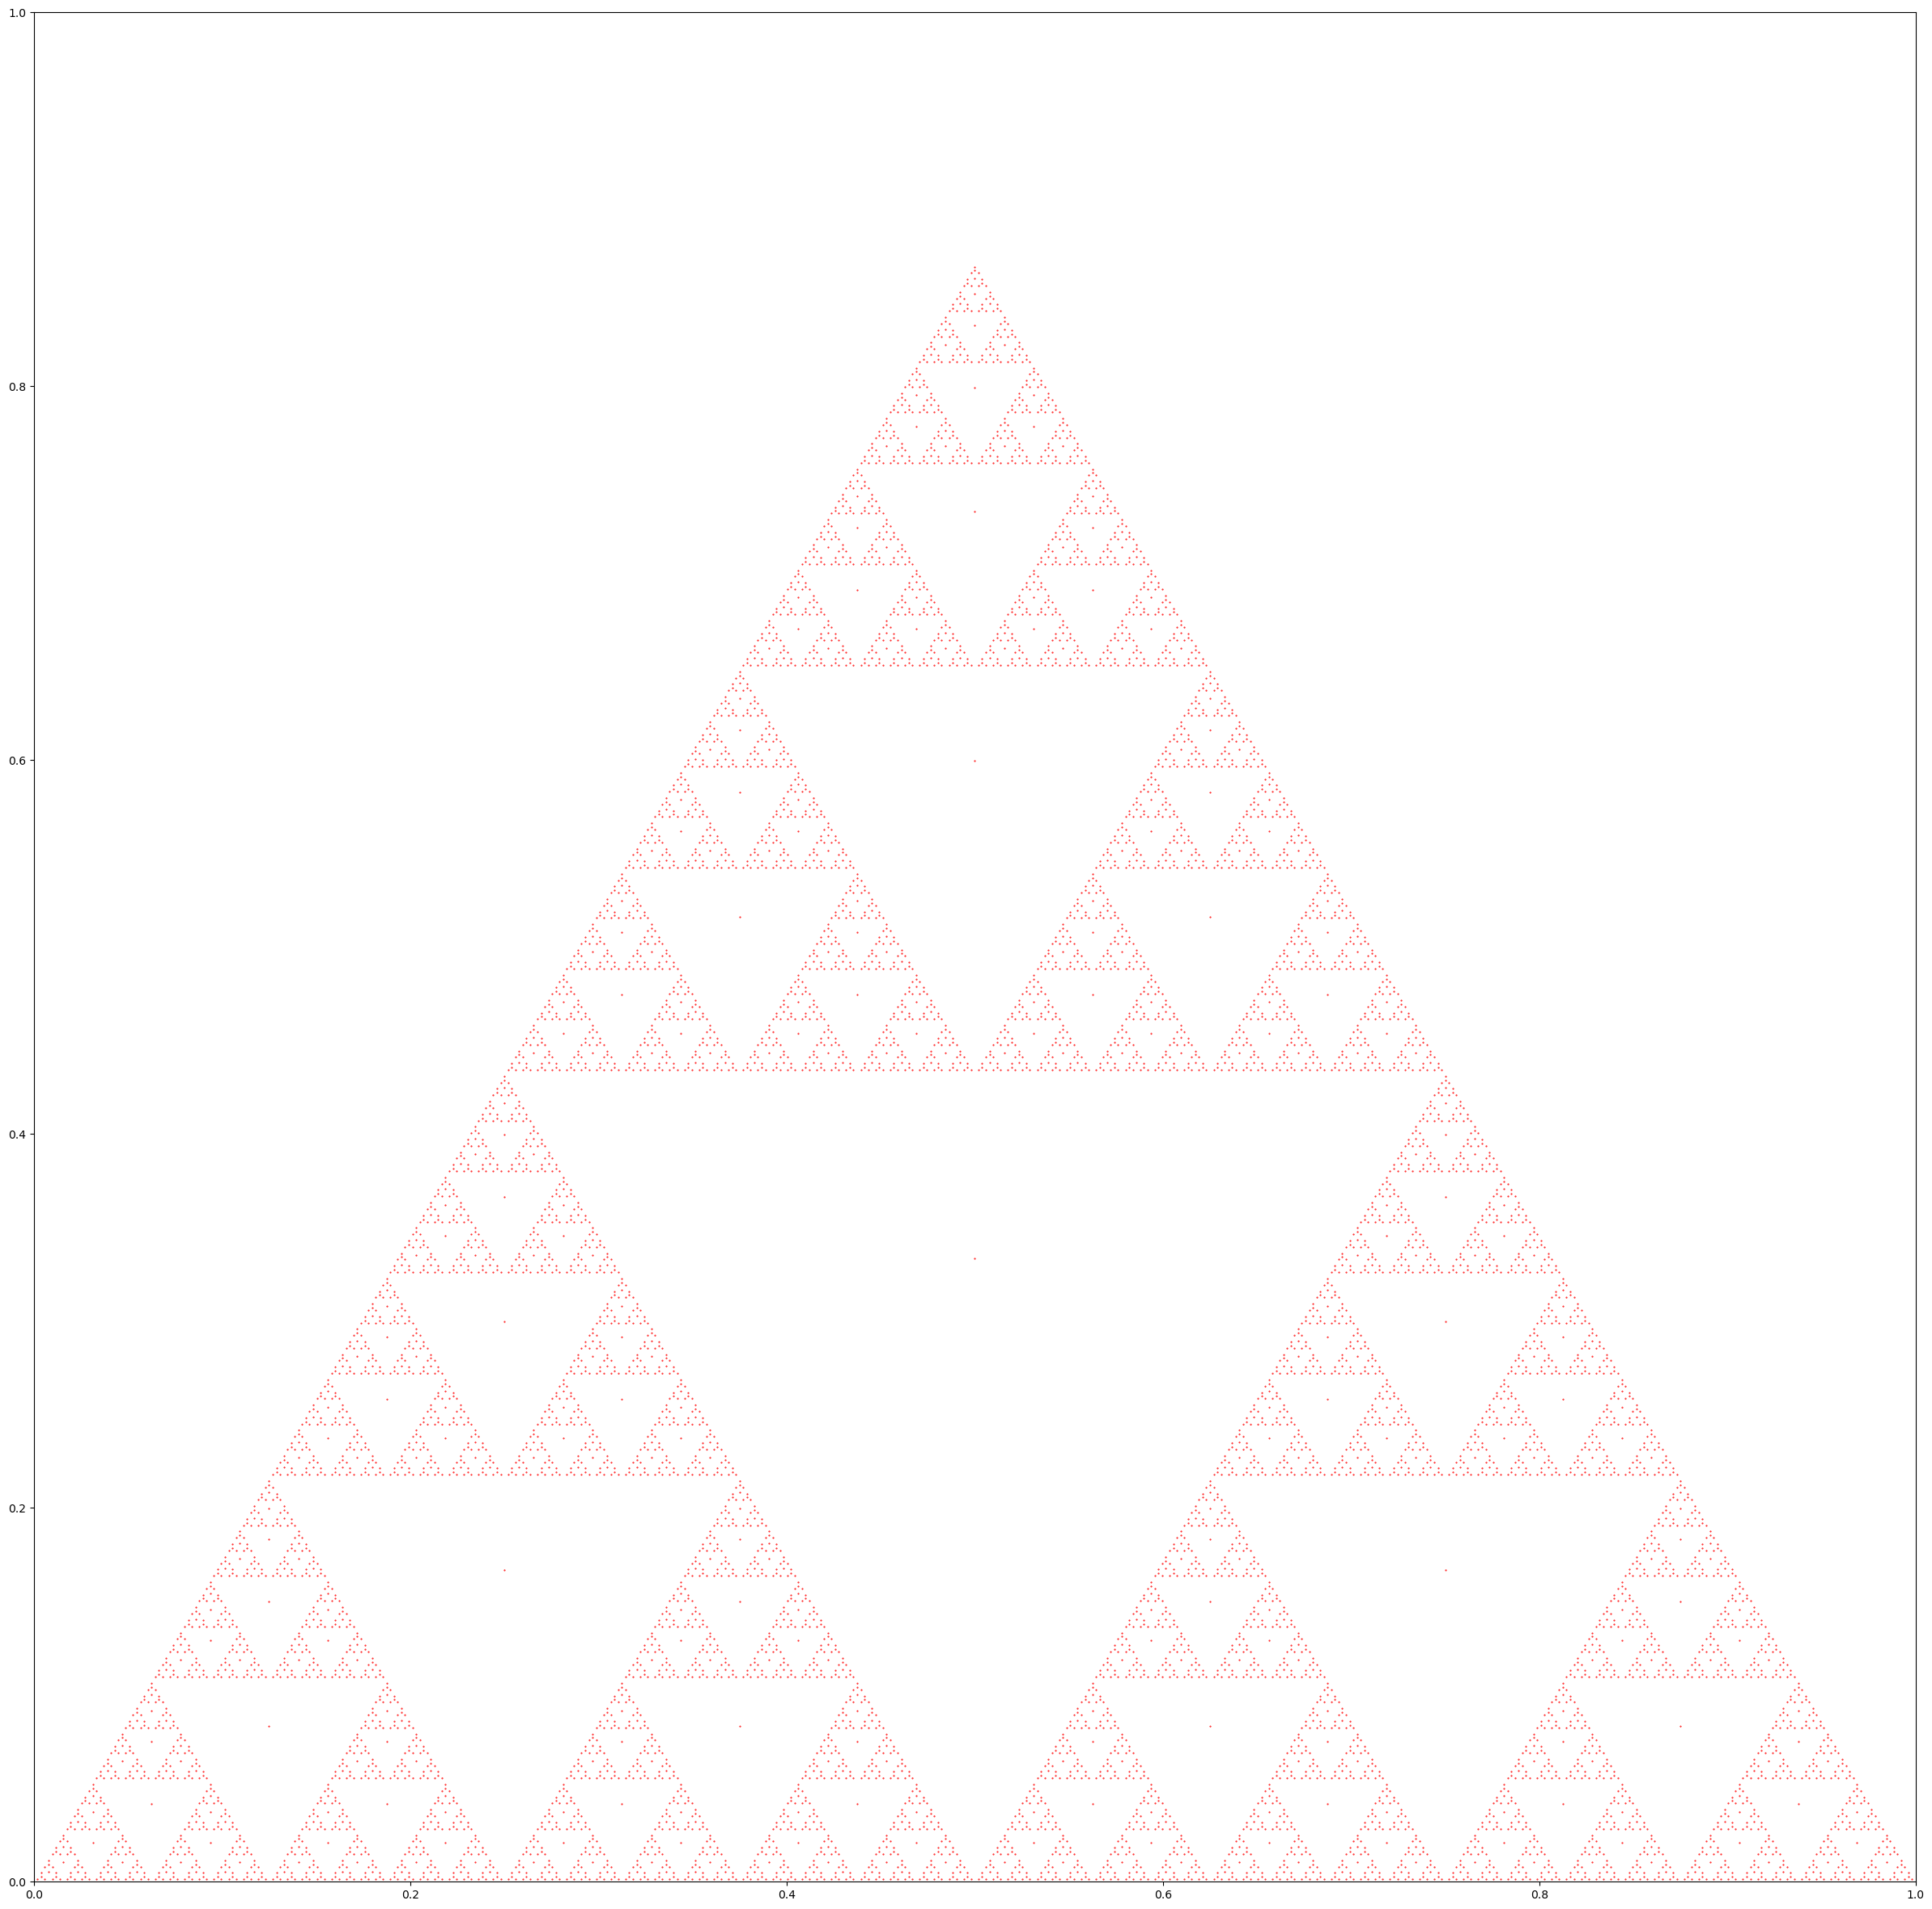

In [8]:
#######################
#######################
###
### Chaos Game: All Possible Worlds (Candide version)
###
#######################
#######################

###################
##
## Change this value to control the resolution of your end result
##
recursion_depth = 8
##
###################

# import the numerical Python library
import numpy as np

# put the resulting figure below this cell in the browser
%pylab inline

# The three paint cans are placed...
# Three (geometrical) vertices of an equilateral triangle of side = 1, one vertex at the origin
v1 = np.array([0.0, 0.0])
v2 = np.array([1.0, 0.0])
v3 = np.array([0.5, np.sqrt(3.0)/2.0])

# Two Lists: Will hold pairs of (x, y) coordinates
x = []
y = []

# We add a first (seed) point to our list of points, outside the triangle
# x.append(0.924)
# y.append(0.873)

x.append(0.5)
y.append(0.33333)

# We indicate that we have one point so far by pointing to its index, 0
currentIndex = len(x)-1

# Euclidean distance returned as a float (not used)
def distance(a, b):
    return np.sqrt((a[0]-b[0])**2 + (a[1]-b[1])**2)

# From point a jump half way to point b and return that new location
def MoveHalfway(a, b):
    return a + 0.5*(b-a)

# From location a generate three new points c, d, e and call myself recursively
#   Unless I have reached a particular end level based on the level counter
def Trifurcate(a, level, endLevel):

    # currentIndex is easy to work with as a global variable
    global currentIndex
    
    # if we are deep enough in the recursion: Just quit
    if level == endLevel: return
    
    # The first of three new locations is q
    q = MoveHalfway(a, v1)
    
    # Now append q onto the x/y Lists
    x.append(q[0])
    y.append(q[1])
    currentIndex += 1
    
    # Recurse to myself using q as the new seed
    Trifurcate(q, level + 1, endLevel)
    
    # And repeat this two more times with respect to v2 and v3
    q = MoveHalfway(a, v2)
    x.append(q[0])
    y.append(q[1])
    currentIndex += 1
    Trifurcate(q, level + 1, endLevel)
    
    q = MoveHalfway(a, v3)
    x.append(q[0])
    y.append(q[1])
    currentIndex += 1
    Trifurcate(q, level + 1, endLevel)
    
    # And now we're all done
    return


# This is the 'program' that runs from the seed point
Trifurcate((x[currentIndex],y[currentIndex]), 0, recursion_depth)

# Draw the scatter plot of (x, y) pairs
figdim = 30
plt.figure(figsize=(figdim,figdim))

if recursion_depth <= 5: dotsize = 1000
elif recursion_depth == 6: dotsize = 300
elif recursion_depth == 7: dotsize = 49
else: dotsize = 1
    
# The ',' comma marker is a small dot, as is the period '.' marker:
plt.scatter(x, y, s=dotsize, marker='.', color='r')
plt.xlim([0., 1.])
plt.ylim([0., 1.])

# Mention how many points we ended up with
print(len(x))
# print(dir(x))
